                                              **CHENNAI HOUSE PRICE PREDICTION.**

**Problem Statement**
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style('dark')
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from scipy.stats import pearsonr
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#**SUPERVISED REGRESSION MODEL.**
   We have the CONTINOUOS variable(df["SALES_PRICE"]), So we have to predict a continuous value and looking it as Regression problem.

In [ ]:
url='https://raw.githubusercontent.com/Praveen3ravi/PROJECT/main/train-chennai-sale.csv'
df = pd.read_csv(url)
print(df.columns)
print('The total number of features:',df.shape[1])

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'SALE_YEAR', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILD_YEAR', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE',
       'COMMIS', 'SALES_PRICE', 'INF_PRICE',
       'NO. YEARS PASSED_FROM_SALE(2022-SALE_YEAR)', '1+0.04', 'POWER(Z,Y)',
       'CURRENT YEAR'],
      dtype='object')
The total number of features: 28


### **DROPPING UNWANTED FEATURES.**

In [ ]:
df=df.drop(['PRT_ID','REG_FEE','COMMIS'],axis=1)

In [ ]:
print("Total number of features in the data is:",df.shape[1])
pd.DataFrame(df.dtypes.value_counts()).T

Total number of features in the data is: 25


,object,float64,int64
0,9,9,7


In [ ]:
categorical_features = [x for x in df.columns 
                if not (df[x].dtype == np.float64 
                        or df[x].dtype == np.int64)]
print(categorical_features)

['AREA', 'DATE_SALE', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']


In [ ]:
numerical_features=[x for x in df.columns if df[x].dtype==np.int64 or df[x].dtype==np.float64]
print(numerical_features)

['INT_SQFT', 'SALE_YEAR', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'BUILD_YEAR', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'INF_PRICE', 'NO. YEARS PASSED_FROM_SALE(2022-SALE_YEAR)', '1+0.04', 'POWER(Z,Y)', 'CURRENT YEAR']


In [ ]:
print('The data has {} categorical features'.format(len(categorical_features)))
print('The data has {} numerical_features'.format(len(numerical_features)))

The data has 9 categorical features
The data has 16 numerical_features


In [ ]:
pd.DataFrame(df.isnull().sum()).T

,AREA,INT_SQFT,DATE_SALE,SALE_YEAR,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILD_YEAR,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,INF_PRICE,NO. YEARS PASSED_FROM_SALE(2022-SALE_YEAR),1+0.04,"POWER(Z,Y)",CURRENT YEAR
0,0,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,48,0,0,0,0,0,0


### **INTERPRETATION.**

In [ ]:
# df['N_BEDROOM'].value_counts()         #1_BHK=3796; 2_BHK=2352; 3_BHK=707; 4_BHK=254;
# df['N_BATHROOM'].value_counts()      # 1_BATHROOM is 5594; 2_BATHROOM is 1515
# df['AREA'].value_counts()            #1.chrompet, 2.karapakam, 3.KK, 4.Velacherry, 5.Anna Nagar, 6.Adyar, 7.T Nagar.
# df['QS_OVERALL'].value_counts() 
# df['SALE_COND'].value_counts()       #Equal.
# df['PARK_FACIL'].value_counts()      # Equal.
# df['UTILITY_AVAIL'].value_counts()   #NoSewer = 3700; AllPub = 1887; ELO = 1522;
# df['STREET'].value_counts()          # More equally same.
# df['AREA'].unique()
# df['SALE_COND'].unique()
# df['BUILDTYPE'].unique()
# df['UTILITY_AVAIL'].unique()
# df['STREET'].unique()
# df['PARK_FACIL'].unique()
# df['N_BEDROOM'].unique()
# df['N_BATHROOM'].unique()
# df['N_ROOM'].unique()
# df[['N_BEDROOM','SALE_COND']].groupby('SALE_COND').count()

###**FILLING THE NULL VALUES.**

In [ ]:
df['N_BEDROOM']=df['N_BEDROOM'].fillna(df['N_BEDROOM'].mean())
df['N_BATHROOM']=df['N_BATHROOM'].fillna(df['N_BATHROOM'].mean())
df['QS_OVERALL']=df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())

df['N_BEDROOM'] = np.floor(df['N_BEDROOM'])
df['N_BATHROOM'] = np.floor(df['N_BATHROOM'])

In [ ]:
pd.DataFrame(df.isnull().sum()).T

,AREA,INT_SQFT,DATE_SALE,SALE_YEAR,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILD_YEAR,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,INF_PRICE,NO. YEARS PASSED_FROM_SALE(2022-SALE_YEAR),1+0.04,"POWER(Z,Y)",CURRENT YEAR
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###**SPELLING CORRECTIONS.**

In [ ]:
df['PARK_FACIL'].replace(['Noo'],['No'],inplace=True)
df['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'],inplace=True)
df['UTILITY_AVAIL'].replace(['NoSewr ','NoSeWa','All Pub'],['No Sewer','No Sewer','AllPub'],inplace=True)
df['BUILDTYPE'].replace(['Comercial','Other'],['Commercial','Others'],inplace=True)
df['SALE_COND'].replace(['Ab Normal','Partiall','PartiaLl','Adj Land'],['AbNormal','Partial','Partial','AdjLand'],inplace=True)
df['AREA'].replace(['Ana Nagar','Ann Nagar','Karapakam','Chrompt','Chrmpet','Chormpet','Adyr','Velchery','KKNagar','TNagar'],
['Anna Nagar','Anna Nagar','Karapakkam','Chrompet','Chrompet','Chrompet','Adyar','Velachery','KK Nagar','T Nagar'],
inplace=True)

In [ ]:
# pd.DataFrame(df.isnull().sum()).T
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   AREA                                        7109 non-null   object 
 1   INT_SQFT                                    7109 non-null   int64  
 2   DATE_SALE                                   7109 non-null   object 
 3   SALE_YEAR                                   7109 non-null   int64  
 4   N_BEDROOM                                   7109 non-null   float64
 5   N_BATHROOM                                  7109 non-null   float64
 6   N_ROOM                                      7109 non-null   int64  
 7   SALE_COND                                   7109 non-null   object 
 8   PARK_FACIL                                  7109 non-null   object 
 9   DATE_BUILD                                  7109 non-null   object 
 10  BUILD_YEAR  

###**CREATING NEW FEATURES FOR DATE_SALE & DATE_BUILD.**

In [ ]:
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])
pd.DataFrame(df.dtypes.value_counts()).T

,float64,object,int64,datetime64[ns]
0,9,7,7,2


In [ ]:
df['BUILD_YEAR'] = df['DATE_BUILD'].dt.year
df['SALE_YEAR'] = df['DATE_SALE'].dt.year

In [ ]:
df["SOLD_AGE"]=df['SALE_YEAR']-df['BUILD_YEAR']

### **DROPPING THE FEATURES WHICH MAKE NO SENSE.**

*Droping ['DATE_SALE','DATE_BUILD'] because we have retrieved the years from those both the features. Droping['PRT_ID'] because we dont need this feature for modeling. Droping ['QS_ROOMS','QS_OVERALL','QS_BATHROOM','MZZONE','QS_BEDROOM'] because they are proprietary(masked) features. Last but not the least, they have less relation with the target variable.*

In [ ]:
df.drop(['DATE_SALE','DATE_BUILD','NO. YEARS PASSED_FROM_SALE(2022-SALE_YEAR)','1+0.04','POWER(Z,Y)','CURRENT YEAR'],axis=1,inplace=True)

###**APPLIED INFLATION TO 4% FOR MY TARGET VARIABLE.**

BEFORE INFLATION AND AFTER INFLATION.


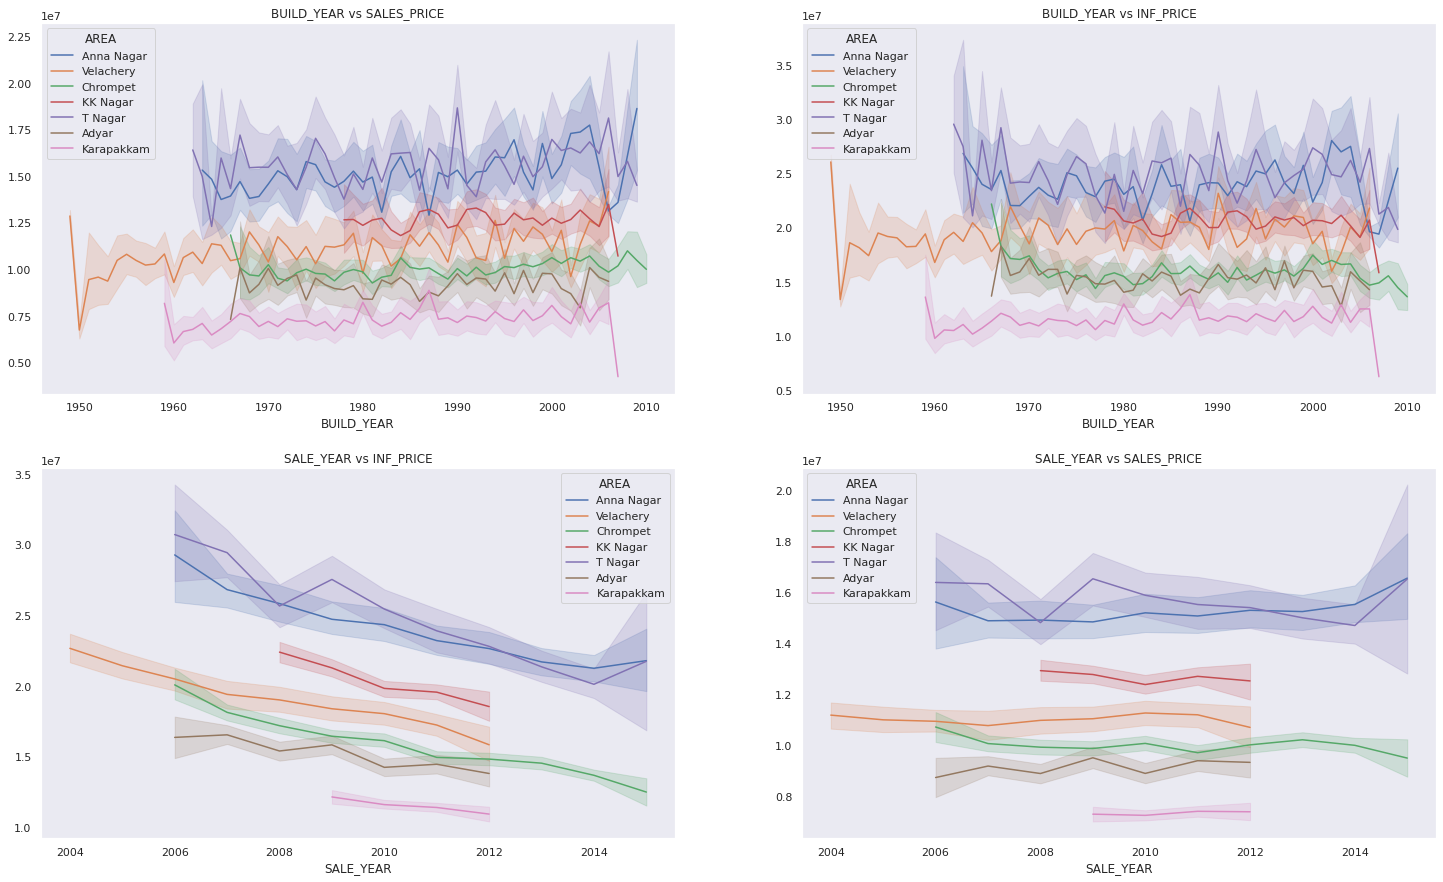

In [ ]:
plt.figure(figsize=(25,15))
print('BEFORE INFLATION AND AFTER INFLATION.')
plt.subplot(221)
sns.lineplot(x = "BUILD_YEAR", y = df["SALES_PRICE"].values, data = df,hue='AREA')
plt.title('BUILD_YEAR vs SALES_PRICE')
plt.subplot(222)
sns.lineplot(x = "BUILD_YEAR", y = df["INF_PRICE"].values, data = df,hue='AREA')
plt.title('BUILD_YEAR vs INF_PRICE')
plt.subplot(223)
sns.lineplot(x = "SALE_YEAR", y = df["INF_PRICE"].values, data = df,hue='AREA')
plt.title('SALE_YEAR vs INF_PRICE')
plt.subplot(224)
sns.lineplot(x = "SALE_YEAR", y = df["SALES_PRICE"].values, data = df,hue='AREA')
plt.title('SALE_YEAR vs SALES_PRICE')
plt.show()

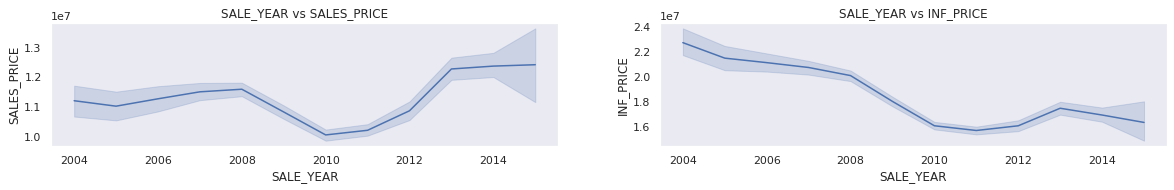

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(221)
sns.lineplot(x = "SALE_YEAR", y = df["SALES_PRICE"], data = df)
plt.title('SALE_YEAR vs SALES_PRICE')
plt.subplot(222)
sns.lineplot(x = "SALE_YEAR", y = df["INF_PRICE"], data = df)
plt.title('SALE_YEAR vs INF_PRICE')
plt.show()



- ***Graph "SALE_YEAR vs INF_PRICE" in general we see that the price has been decreased. But increased slightly on 2012-2013.***

# **DATA VISUALISATION.**

In [ ]:
A=df['AREA'].groupby(df['AREA']).count()
B=df['AREA'].groupby(df['BUILDTYPE']).count()
C=df['AREA'].groupby(df['UTILITY_AVAIL']).count()
D=df['AREA'].groupby(df['STREET']).count()
E=df['AREA'].groupby(df['MZZONE']).count()
F=df['AREA'].groupby(df['PARK_FACIL']).count()

## **DISTRIBUTION OF THE DATA.**

- **BUILDTYPE** - Number of "House" building type is higher than "Commercial" and "Other" building type.
- **AREA** - Number of building in "Chrompet" is higher than other area's. "T Nagar" has low number of building when compared with other area's.
- **UTILITY_AVAILABLE** - "NoSewer" building is higher than "ALLPUB" and "ELO" building.

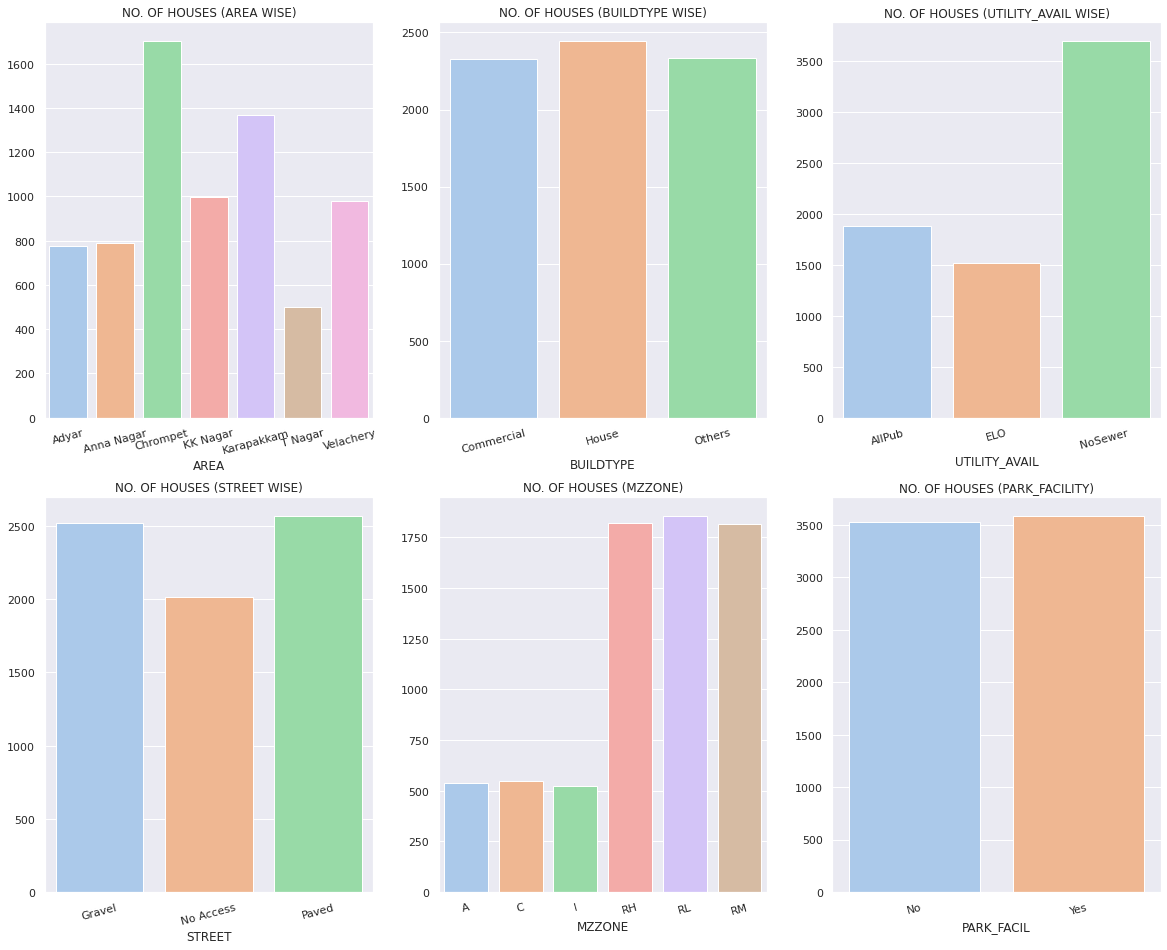

In [ ]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20,16))
plt.subplot(231)
sns.barplot(x=A.index,y=A.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (AREA WISE)')
plt.subplot(232)
sns.barplot(x=B.index,y=B.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (BUILDTYPE WISE)')
plt.subplot(233)
sns.barplot(x=C.index,y=C.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (UTILITY_AVAIL WISE)')
plt.subplot(234)
sns.barplot(x=D.index,y=D.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (STREET WISE)')
plt.subplot(235)
sns.barplot(x=E.index,y=E.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (MZZONE)')
plt.subplot(236)
sns.barplot(x=F.index,y=F.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (PARK_FACILITY)')
plt.show()

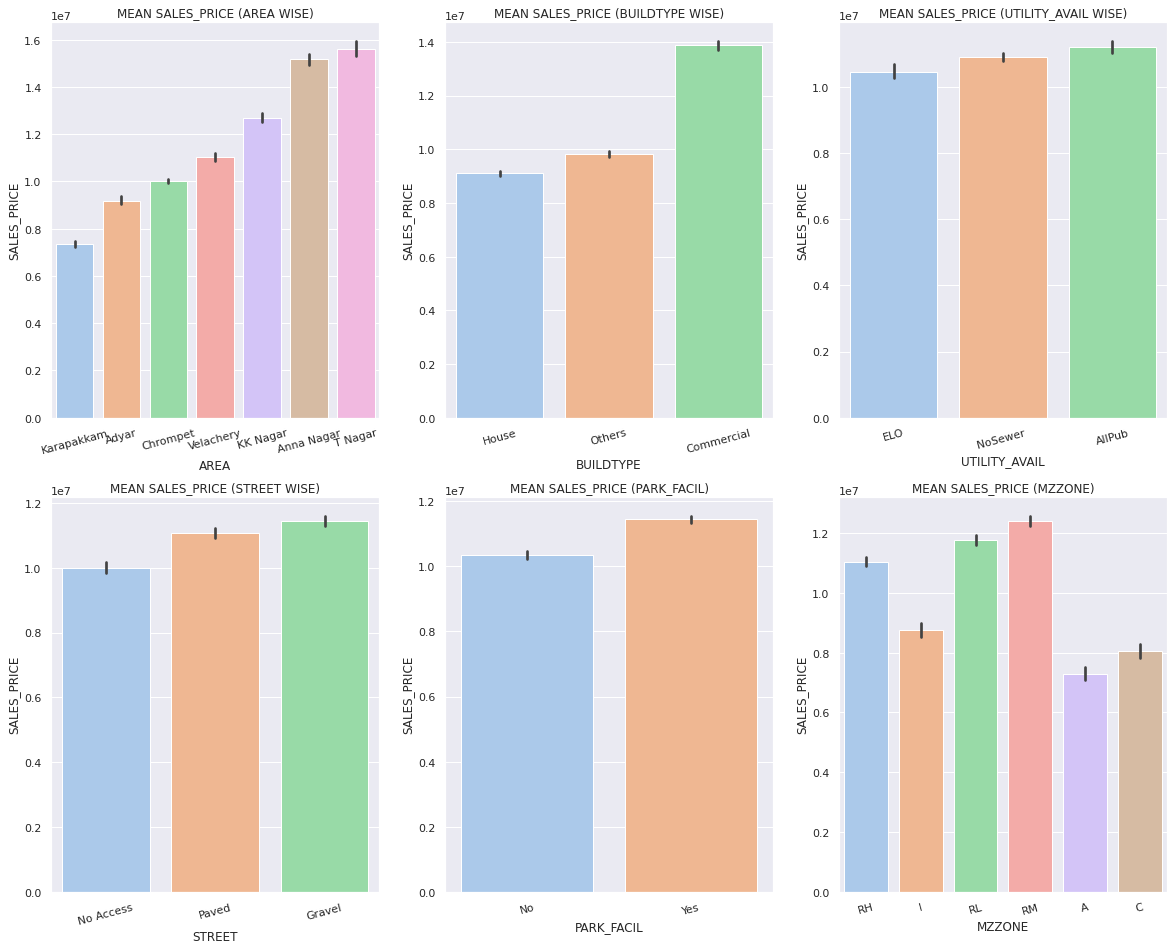

In [ ]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20,16))
plt.subplot(231)
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (AREA WISE)')
plt.subplot(232)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (BUILDTYPE WISE)')
plt.subplot(233)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (UTILITY_AVAIL WISE)')
plt.subplot(234)
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (STREET WISE)')
plt.subplot(235)
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df)
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (PARK_FACIL)')
plt.subplot(236)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df)
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (MZZONE)')
plt.show()

In [ ]:
df.columns

Index(['AREA', 'INT_SQFT', 'SALE_YEAR', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'SALE_COND', 'PARK_FACIL', 'BUILD_YEAR', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'INF_PRICE', 'SOLD_AGE'],
      dtype='object')

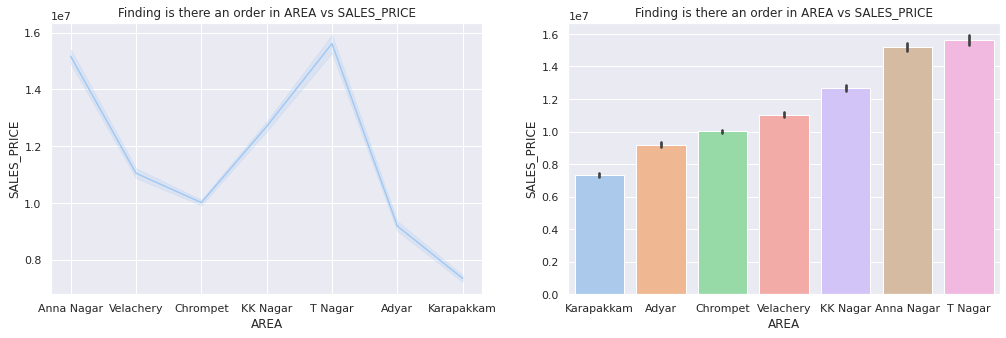

In [ ]:
plt.figure(figsize=(17,5))
plt.subplot(121)
sns.lineplot(x=df['AREA'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in AREA vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('Finding is there an order in AREA vs SALES_PRICE')
plt.show()

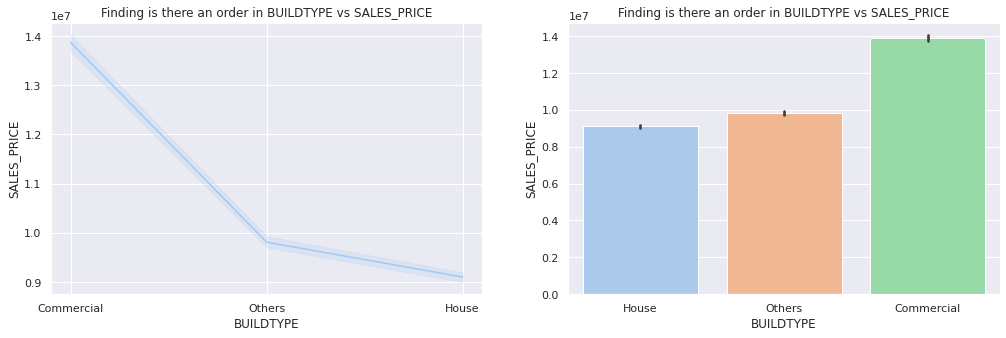

In [ ]:
plt.figure(figsize=(17,5))
plt.subplot(121)
sns.lineplot(x=df['BUILDTYPE'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in BUILDTYPE vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('Finding is there an order in BUILDTYPE vs SALES_PRICE')
plt.show()

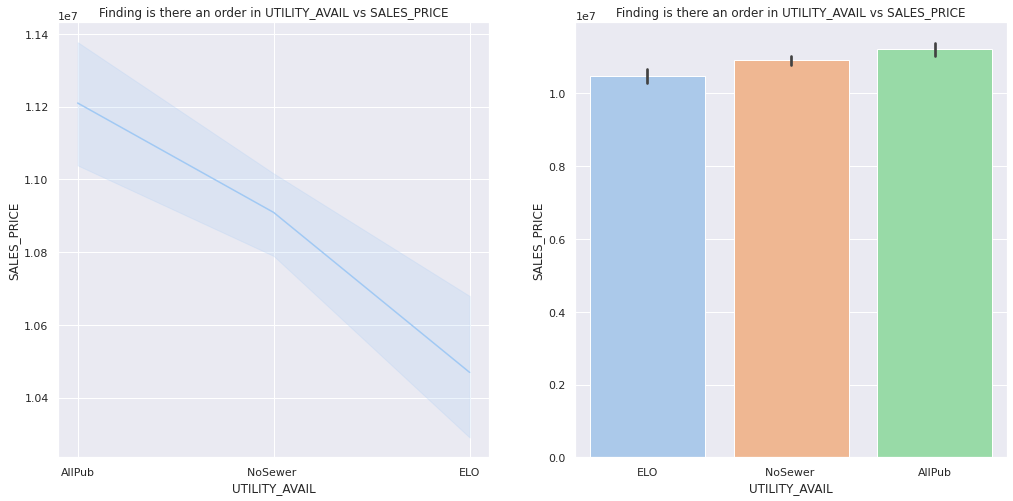

In [ ]:
plt.figure(figsize=(17,8))
plt.subplot(121)
sns.lineplot(x=df['UTILITY_AVAIL'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in UTILITY_AVAIL vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('Finding is there an order in UTILITY_AVAIL vs SALES_PRICE')
plt.show()

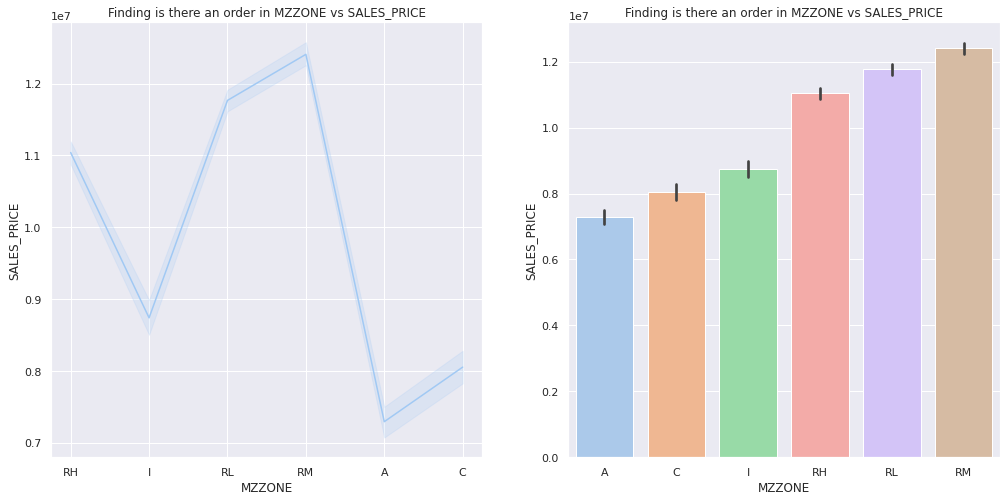

In [ ]:
plt.figure(figsize=(17,8))
plt.subplot(121)
sns.lineplot(x=df['MZZONE'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in MZZONE vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('Finding is there an order in MZZONE vs SALES_PRICE')
plt.show()

- ***In above all the graphs there is an linear trend. For Encoding this categorical variable we use Label Encoding.***

##**REALTION WITH TARGET VARIABLE.**

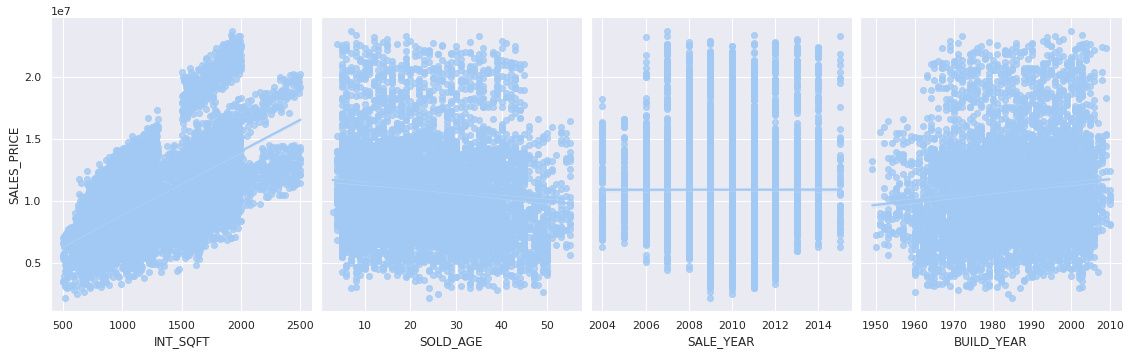

In [ ]:
sns.pairplot(df,x_vars=["INT_SQFT", "SOLD_AGE","SALE_YEAR","BUILD_YEAR"], y_vars=["SALES_PRICE"],
             height=5,aspect=.8, kind="reg")
plt.show()

- ***In above graph i have checked whether if there is a linear relationship with target_variable('SALES_PRICE').Only "INT_SQFT" has the clear linear relation with the target_variable('SALES_PRICE'), others are flatten.***

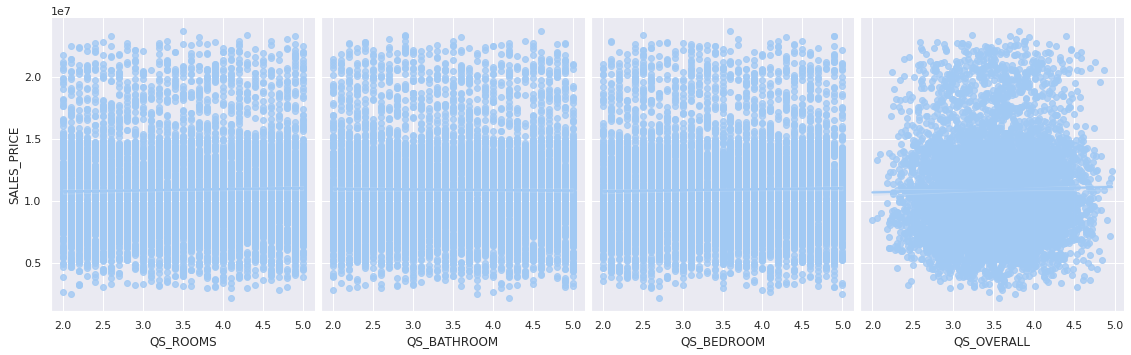

In [ ]:
sns.pairplot(df,x_vars=["QS_ROOMS", "QS_BATHROOM","QS_BEDROOM","QS_OVERALL"], y_vars=["SALES_PRICE"],
             height=5, aspect=.8, kind="reg")
plt.show()

- ***In above graph i have checked other few features has a linear relationship with target_variable('SALES_PRICE'). No features has the linear relationship with the target_variable('SALES_PRICE').***

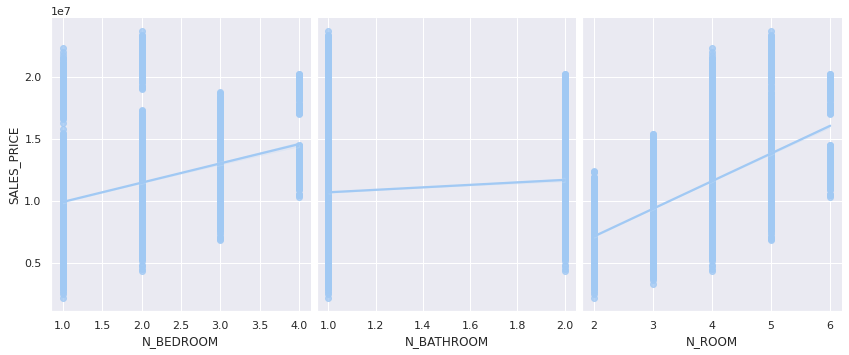

In [ ]:
sns.pairplot(df,x_vars=["N_BEDROOM", "N_BATHROOM","N_ROOM"], y_vars=["SALES_PRICE"],
             height=5, aspect=.8, kind="reg")
plt.show()

- ***In above graph i have checked other few features has a linear relationship with target_variable('SALES_PRICE'). ["N_ROOMS","N_BEDROOM"] has the linear relationship with the target_variable(SALES_PRICE). But "N_BATHROOM" has no linear relationship with the target_variable('SALES_PRICE').***

In [ ]:
#----------------------------------------
#BUILDTYPE WISE MIN.AVG.MAX Sales_Prices:-
#----------------------------------------
buildtype_fltr_C = df['BUILDTYPE']=='Commercial'
commercial=df.loc[buildtype_fltr_C]
min = commercial['SALES_PRICE'].min()
mean= commercial['SALES_PRICE'].mean()
median = commercial['SALES_PRICE'].median()
max = commercial['SALES_PRICE'].max()
index=['Minimun_Sales_Price','Average_Sales_Price','Median_Sales_Price','Maximum_Sales_Price']
comm = pd.DataFrame([min,mean,median,max],columns=['Commercial'],index=index)

buildtype_fltr_H = df['BUILDTYPE']=='House'
House=df.loc[buildtype_fltr_H]
min = House['SALES_PRICE'].min()
mean= House['SALES_PRICE'].mean()
median = House['SALES_PRICE'].median()
max = House['SALES_PRICE'].max()
house = pd.DataFrame([min,mean,median,max],columns=['House'],index=index)

buildtype_fltr_O = df['BUILDTYPE']=='Others'
Others=df.loc[buildtype_fltr_O]
min = Others['SALES_PRICE'].min()
mean= Others['SALES_PRICE'].mean()
median = Others['SALES_PRICE'].median()
max = Others['SALES_PRICE'].max()
others = pd.DataFrame([min,mean,median,max],columns=['Others'],index=index)

Build_type_mmm = pd.concat([comm,house,others],axis=1)
Build_type_mmm = pd.DataFrame(Build_type_mmm.T)
Build_type_mmm["Build_type"]=["Commercial","House","Others"]

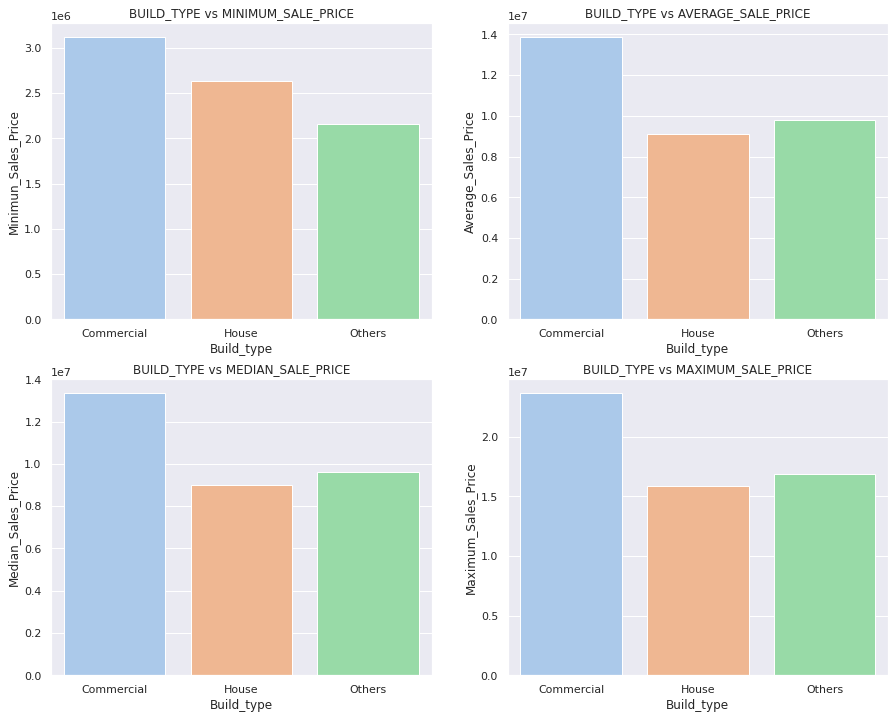

In [ ]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.barplot(x="Build_type",y="Minimun_Sales_Price",data=Build_type_mmm)
plt.title('BUILD_TYPE vs MINIMUM_SALE_PRICE')
plt.subplot(222)
sns.barplot(x="Build_type",y="Average_Sales_Price",data=Build_type_mmm)
plt.title('BUILD_TYPE vs AVERAGE_SALE_PRICE')
plt.subplot(223)
sns.barplot(x="Build_type",y="Median_Sales_Price",data=Build_type_mmm)
plt.title('BUILD_TYPE vs MEDIAN_SALE_PRICE')
plt.subplot(224)
sns.barplot(x="Build_type",y="Maximum_Sales_Price",data=Build_type_mmm)
plt.title('BUILD_TYPE vs MAXIMUM_SALE_PRICE')
plt.show()

-  **COMMERCIAL** - In all graphs, the Minimum,Average,Median and Maximum Price of commercial building is higher than "House" and "Others" building type.
-  **House** - Minimum price of "House" price is higher than "Others" building type, but Maximum,Average and Median Price lower than "Others" building type.
-  **Others** - Minimum price of "Others" price is lower than "House" building type, but Maximum,Average and Median Price higher than "House" building type.

In [ ]:
#----------------------------
#AREA WISE MIN.AVG.MAX Sales_Prices:-
#----------------------------
mean=df.groupby('AREA')['SALES_PRICE'].mean()
mean_=mean.values
max=df.groupby('AREA')['SALES_PRICE'].max()
max_=max.values
min=df.groupby('AREA')['SALES_PRICE'].min()
min_=min.values
median=df.groupby('AREA')['SALES_PRICE'].median()
median_=min.values
Area_mmm=pd.DataFrame([min_,mean_,median_,max_],columns=mean.index,index=['Minimun_Sales_Price','Average_Sales_Price','Median_Sales_Price','Maximum_Sales_Price']).T
Area_mmm["AREA"]=["Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery"]

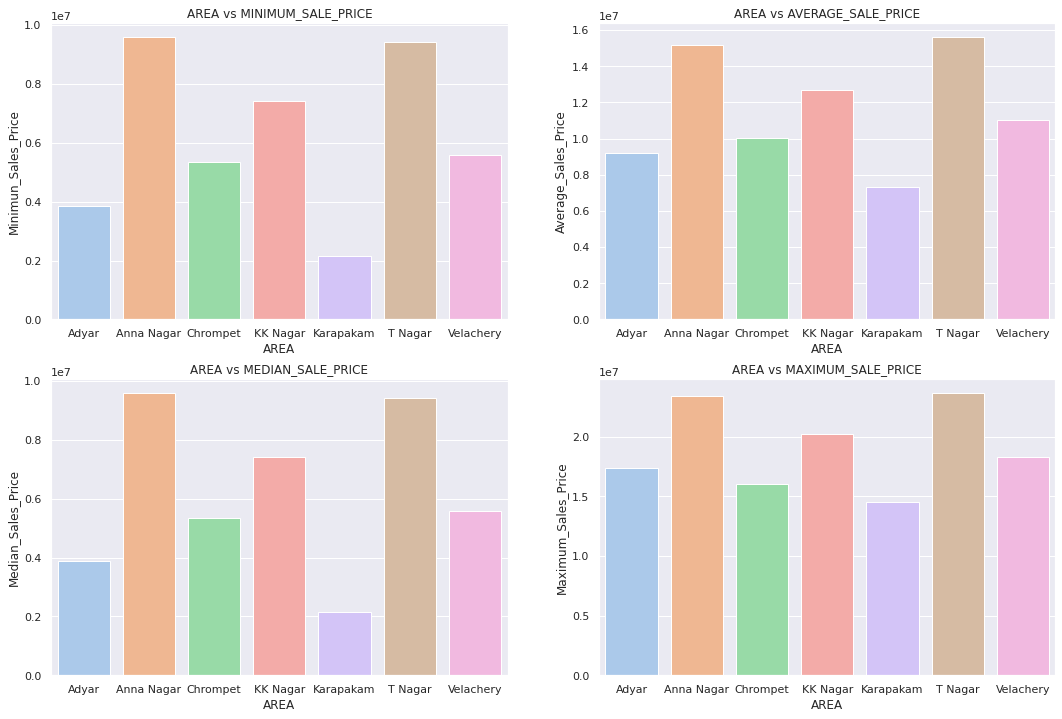

In [ ]:
plt.figure(figsize=(18,12))
plt.subplot(221)
sns.barplot(x='AREA',y='Minimun_Sales_Price',data=Area_mmm)
plt.title('AREA vs MINIMUM_SALE_PRICE')
plt.subplot(222)
sns.barplot(x='AREA',y='Average_Sales_Price',data=Area_mmm)
plt.title('AREA vs AVERAGE_SALE_PRICE')
plt.subplot(223)
sns.barplot(x='AREA',y='Median_Sales_Price',data=Area_mmm)
plt.title('AREA vs MEDIAN_SALE_PRICE')
plt.subplot(224)
sns.barplot(x='AREA',y='Maximum_Sales_Price',data=Area_mmm)
plt.title('AREA vs MAXIMUM_SALE_PRICE')
plt.show()

In [ ]:
mean=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].mean())
median=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].median())
max=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].max())
min=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].min())

In [ ]:
mmm_df = pd.concat([min,mean['SALES_PRICE'].rename('Average'),median['SALES_PRICE'].rename('Median'),max['SALES_PRICE'].rename('Maximum')],axis=1)
column =['Minimum','Average','Median','Maximum']
mmm__df = pd.DataFrame(mmm_df)
mmm__df.rename(columns={'SALES_PRICE':'Minimum'},inplace=True)
mmm__df['BUILDTYPE']=['Commercial','Commercial','Commercial','Commercial','Commercial','Commercial','Commercial',
                      'House','House','House','House','House','House','House',
                      'Others','Others','Others','Others','Others','Others','Others']
mmm__df['AREA']=["Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery",
                 "Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery",
                 "Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery"]                                     

## -  **RESPECTIVE WITH MINIMUM PRICE OF EACH AREA.**
-  **COMMERCIAL** - *(LOW - HIGH)* - Karapakkam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"]. "T Nagar" is the first highest according to the "Sales_Price".
-  **HOUSE** - *(LOW - HIGH)* - Again Karapakam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"]. Again "T Nagar" is the first highest according to the "Sales_Price".
- **OTHERS** - *(LOW - HIGH)* - Again Karapakam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"]. Again "T Nagar" is the first highest according to the "Sales_Price".

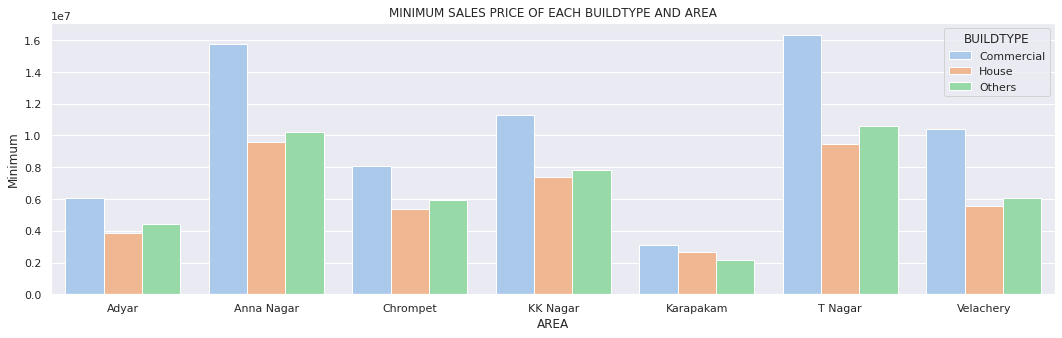

In [ ]:
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='Minimum',data=mmm__df,hue='BUILDTYPE')
plt.title('MINIMUM SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()

## -  **RESPECTIVE WITH AVERAGE PRICE OF EACH AREA.**
-  **COMMERCIAL** - *(LOW - HIGH)* - Karapakkam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"]. "T Nagar" is the first highest according to the "Sales_Price".
-  **HOUSE** - *(LOW - HIGH)* - Again Karapakam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar""Anna Nagar","T Nagar"]. Again "T Nagar" is the first highest according to the "Sales_Price".
- **OTHERS** - *(LOW - HIGH)* - Again Karapakam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"]. Again "T Nagar" is the first highest according to the "Sales_Price".

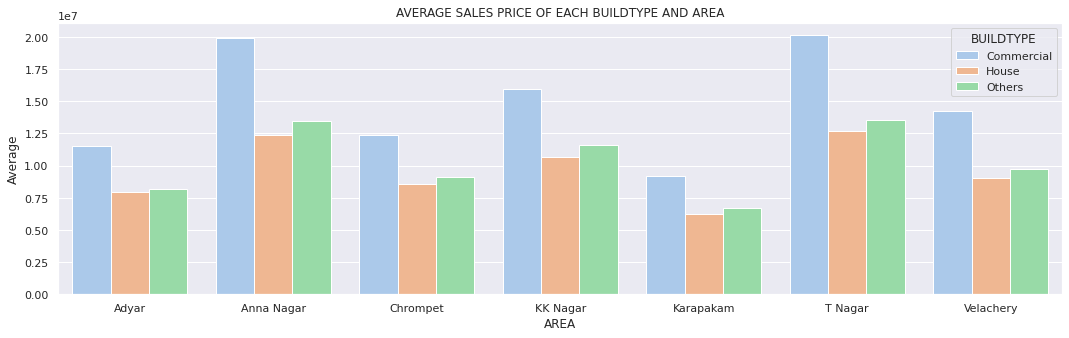

In [ ]:
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='Average',data=mmm__df,hue='BUILDTYPE')
plt.title('AVERAGE SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()

## -  **RESPECTIVE WITH MAXIMUM PRICE OF EACH AREA.**
-  **COMMERCIAL** - *(LOW - HIGH)* - Karapakkam area has the lowest price when compared with other area's. Followed with ["Chrompet","Adyar","Velachery","KK Nagar","Anna Nagar","T Nagar"]. "T Nagar" is the first highest according to the "Sales_Price".
-  **HOUSE** - *(LOW - HIGH)* - Again Karapakam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar""Anna Nagar","T Nagar"]. Again "T Nagar" is the first highest according to the "Sales_Price".
- **OTHERS** - *(LOW - HIGH)* - Again Karapakam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"]. Again "T Nagar" is the first highest according to the "Sales_Price".

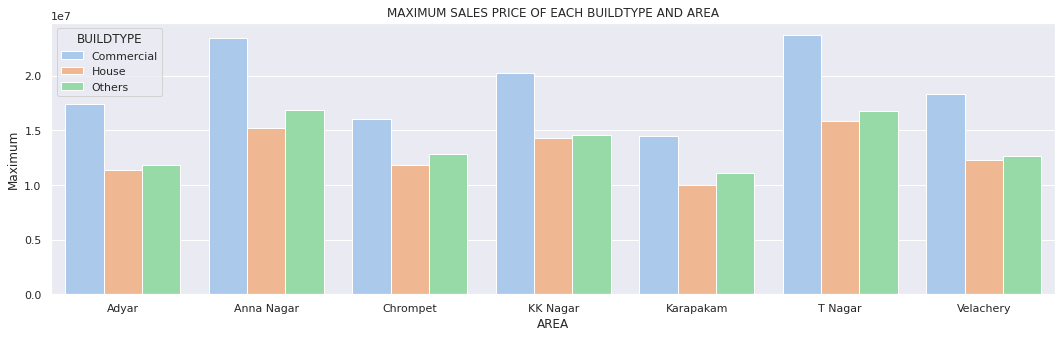

In [ ]:
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='Maximum',data=mmm__df,hue='BUILDTYPE')
plt.title('MAXIMUM SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()

# **ENCODING THE CATEGORICAL FEATURES.**

In [ ]:
df.head(2)

,AREA,INT_SQFT,SALE_YEAR,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILD_YEAR,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,INF_PRICE,SOLD_AGE
0,Anna Nagar,1986,2006,2.0,1.0,5,AbNormal,No,1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,40676975.91,11
1,Velachery,1855,2010,3.0,2.0,5,Family,No,1988,Others,NoSewer,Paved,I,4.7,3.9,3.6,4.010,9630290,15418404.56,22


In [ ]:
pd.DataFrame(df.dtypes.value_counts()).T

,object,float64,int64
0,7,7,6


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 

In [ ]:
df['PARK_FACIL']=le.fit_transform(df['PARK_FACIL'])
df['AREA']=le.fit_transform(df['AREA'])
df['BUILDTYPE']=le.fit_transform(df['BUILDTYPE'])
df['SALE_COND']=le.fit_transform(df['SALE_COND'])
df['UTILITY_AVAIL']=le.fit_transform(df['UTILITY_AVAIL'])
df['STREET']=le.fit_transform(df['STREET'])
df['MZZONE']=le.fit_transform(df['MZZONE'])

In [ ]:
df.head()

,AREA,INT_SQFT,SALE_YEAR,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILD_YEAR,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,INF_PRICE,SOLD_AGE
0,1,1986,2006,2.0,1.0,5,0,0,1995,0,0,0,3,4.9,4.2,2.5,3.765,21717770,40676975.91,11
1,6,1855,2010,3.0,2.0,5,2,0,1988,2,2,2,2,4.7,3.9,3.6,4.010,9630290,15418404.56,22
2,2,1220,2014,2.0,1.0,4,4,0,2009,0,2,1,3,4.5,2.6,3.1,3.320,12394750,16963071.24,5
3,2,1167,2007,1.0,1.0,3,4,0,1979,2,0,1,4,3.6,2.1,2.5,2.670,8488790,15287831.22,28
4,6,1847,2006,3.0,2.0,5,2,0,1996,0,0,0,5,2.4,4.5,2.1,3.260,16800250,31466553.17,10


# **FEATURE IMPORTANCE.**

##**CORRELATION WITHIN THE FEATURES.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from scipy.stats import pearsonr

In [ ]:
X=df.drop(['SALES_PRICE','INF_PRICE'],axis=1)
y=df['SALES_PRICE']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 18), (1422, 18), (5687,), (1422,))

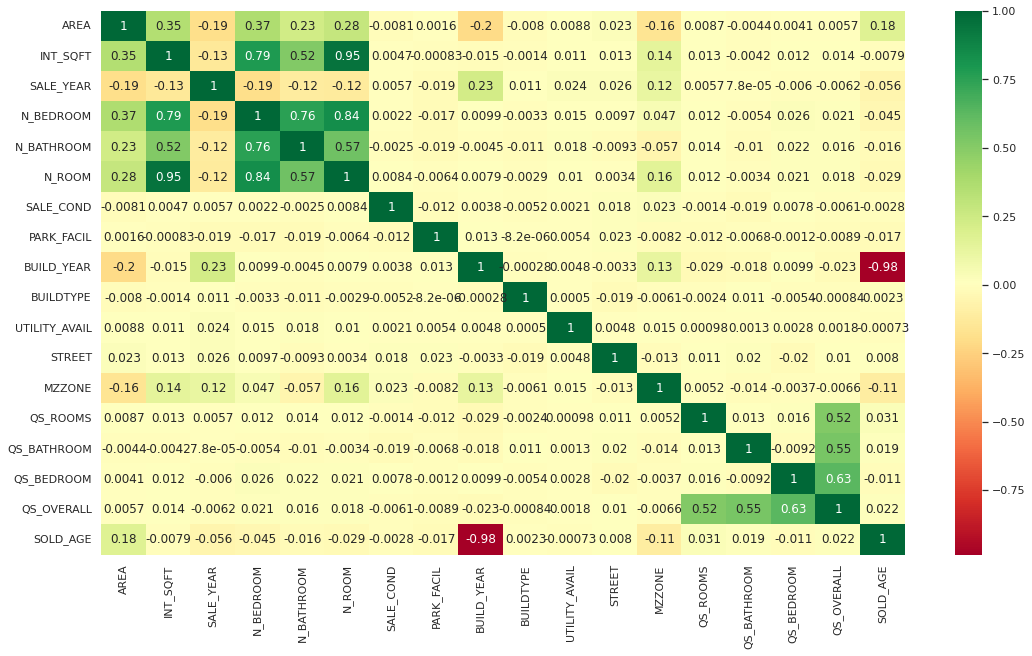

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(18,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True,cmap='RdYlGn')
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are use absolute() to even focus on -ve coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))
print('This column are highly correlated with another column:',corr_features)

This column are highly correlated with another column: {'N_ROOM', 'SOLD_AGE'}


In [ ]:
cwf_train=X_train.drop(corr_features,axis=1)
cwf_test=X_test.drop(corr_features,axis=1)

In [ ]:
cwf_train.shape
# y_train.shape

(5687, 16)

In [ ]:
train = pd.concat([cwf_train,y_train],axis=1)
test = pd.concat([cwf_test,y_test],axis=1)

In [ ]:
new_df=pd.concat([train,test],axis=0)
new_df.shape
print("PREVIOUSLY THE NO. OF FEATURE IS:",df.shape)
print("NOW THE NO. OF FEATURE IS:",new_df.shape)
print("{} FEATURE IS BEEN REDUCED AFTER CORRELATION WITHIN INDEPENDENT FEATURES INCLUDING INF_PRICE".format(df.shape[1]-new_df.shape[1]))

PREVIOUSLY THE NO. OF FEATURE IS: (7109, 20)
NOW THE NO. OF FEATURE IS: (7109, 17)
3 FEATURE IS BEEN REDUCED AFTER CORRELATION WITHIN INDEPENDENT FEATURES INCLUDING INF_PRICE


##**CORRELATION WITH TARGET VARIABLE.**

,AREA,INT_SQFT,SALE_YEAR,N_BEDROOM,N_BATHROOM,SALE_COND,PARK_FACIL,BUILD_YEAR,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
SALES_PRICE,-0.019138,0.612125,0.000906,0.330987,0.108834,-0.030732,0.146428,0.116043,-0.436276,-0.023812,-0.042652,0.427789,0.021967,-0.011377,0.018804,0.020485,1.0


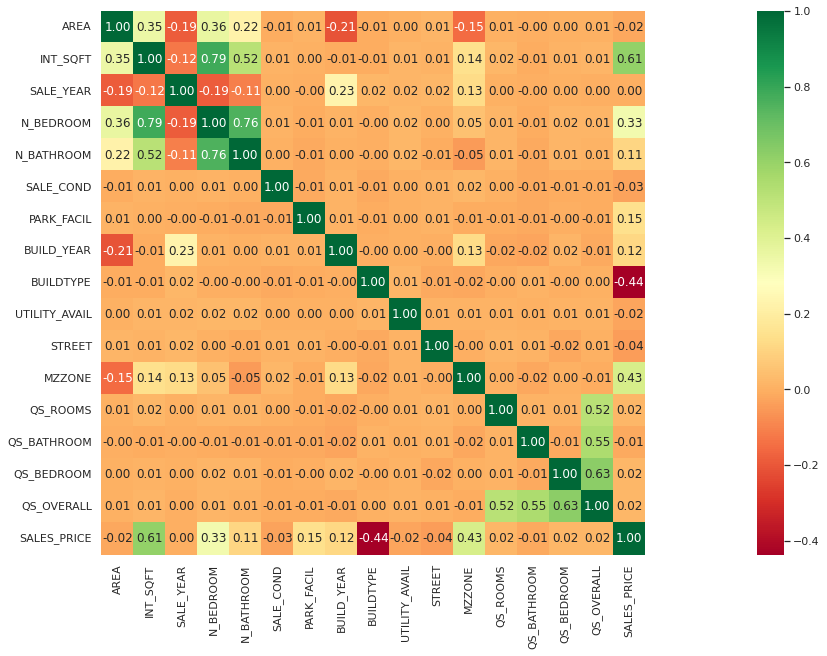

In [ ]:
#correlation matrix
corrmat = new_df.corr()
plt.figure(figsize=(40, 10))
sns.heatmap(corrmat, cbar=True, fmt='.2f', annot=True, cmap='RdYlGn', square=True)
i=pd.DataFrame(new_df[new_df.columns[:]].corr()['SALES_PRICE'][:]).T
i=i.iloc[0]
pd.DataFrame(i).T

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from scipy.stats import pearsonr
scaler=StandardScaler()
minmax=MinMaxScaler()

In [ ]:
X=new_df.drop(['SALES_PRICE'],axis=1)
y=new_df['SALES_PRICE']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 16), (1422, 16), (5687,), (1422,))

In [ ]:
best_features_X = SelectKBest(score_func=f_regression,k=10).fit_transform(X,y)
# print(best_features_X.scores_)

In [ ]:
correlation_list=[]
for column in X.columns:
  corr_list=pearsonr(X[column],y)
  correlation_list.append([column,corr_list[0],corr_list[1]])

In [ ]:
corr_df=pd.DataFrame(correlation_list,columns=['Features','Correlation','P-Value'])
corr_df.sort_values(by='P-Value',inplace=True)
corr_df.T

,1,8,11,3,6,7,4,10,5,9,12,15,0,14,13,2
Features,INT_SQFT,BUILDTYPE,MZZONE,N_BEDROOM,PARK_FACIL,BUILD_YEAR,N_BATHROOM,STREET,SALE_COND,UTILITY_AVAIL,QS_ROOMS,QS_OVERALL,AREA,QS_BEDROOM,QS_BATHROOM,SALE_YEAR
Correlation,0.612125,-0.436276,0.427789,0.330987,0.146428,0.116043,0.108834,-0.042652,-0.030732,-0.023812,0.021967,0.020485,-0.019138,0.018804,-0.011377,0.000906
P-Value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000322,0.00956,0.044681,0.064015,0.084155,0.106634,0.112895,0.337486,0.939123


In [ ]:
model_training_feature1 = corr_df['Features']
model_training_feature1 = model_training_feature1.to_list()
model_training_feature = corr_df['Features']
model_training_feature = model_training_feature.to_list()
model_training_feature

['INT_SQFT',
 'BUILDTYPE',
 'MZZONE',
 'N_BEDROOM',
 'PARK_FACIL',
 'BUILD_YEAR',
 'N_BATHROOM',
 'STREET',
 'SALE_COND',
 'UTILITY_AVAIL',
 'QS_ROOMS',
 'QS_OVERALL',
 'AREA',
 'QS_BEDROOM',
 'QS_BATHROOM',
 'SALE_YEAR']

In [ ]:
new_df = pd.DataFrame(new_df,columns=model_training_feature)
new_df=pd.concat([new_df,df['SALES_PRICE']],axis=1)

In [ ]:
new_df.head(2)

,INT_SQFT,BUILDTYPE,MZZONE,N_BEDROOM,PARK_FACIL,BUILD_YEAR,N_BATHROOM,STREET,SALE_COND,UTILITY_AVAIL,QS_ROOMS,QS_OVERALL,AREA,QS_BEDROOM,QS_BATHROOM,SALE_YEAR,SALES_PRICE
0,1986,0,3,2.0,0,1995,1.0,0,0,0,4.9,3.765,1,2.5,4.2,2006,21717770
1,1855,2,2,3.0,0,1988,2.0,2,2,2,4.7,4.010,6,3.6,3.9,2010,9630290


#**VARIANCE INFLATION FACTOR.**

*Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.*

In [ ]:
X=new_df.drop(['SALES_PRICE'],axis=1)
y=new_df['SALES_PRICE']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 16), (1422, 16), (5687,), (1422,))

***This measures the multi-colinearity. If it is more than 5, then we should investigate our features.***
-  **Multicollinearity** - is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model. ... In general, multicollinearity can lead to wider confidence intervals that produce less reliable probabilities in terms of the effect of independent variables in a model.

In [ ]:
#if VIF is more than 4 then we have change the feature. 
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
r2=lr_model.score(X_train,y_train)
vif=1/(1-r2)
vif

4.515931586589249

# **MACHINE LEARNING MODEL:**
- As its an continous data, I'm attempting regression model.


In [ ]:
df=new_df
# df.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
scaler=StandardScaler()
minmax=MinMaxScaler()

In [ ]:
X=new_df.drop('SALES_PRICE',axis=1)
y=df['SALES_PRICE']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 16), (1422, 16), (5687,), (1422,))

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **CROSS VALIDATION**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
import xgboost as xg
# xg_model = XGBRegressor()
xg_model= xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=2,                 
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                ) 
rf = RandomForestRegressor(n_estimators= 1000, max_depth = 4, max_features='sqrt')

In [ ]:
CV_Linear_regression = cross_val_score(lr_model,X_train_scaled,y_train,cv=10).mean()
print("The cross_validation score of an Linear_Regression model is:",CV_Linear_regression)

The cross_validation score of an Linear_Regression model is: 0.7770987851132124


In [ ]:
CV_XG_Boost = cross_val_score(xg_model,X_train_scaled,y_train,cv=10).mean()
print("The cross_validation score of an XG_Boost model is:",CV_XG_Boost)

[10:54:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:55:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:55:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:55:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:56:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:56:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:57:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
CV_RandomForest = cross_val_score(rf,X_train_scaled,y_train,cv=10).mean()
print("The cross_validation score of an XG_Boost model is:",CV_RandomForest)

The cross_validation score of an XG_Boost model is: 0.7933702248009421


In [ ]:
print("The cross_validation score of an Linear_Regression model is:",CV_Linear_regression)
print("The cross_validation score of an XG_Boost model is:",CV_XG_Boost)
print("The cross_validation score of an Random_Forest model is:",CV_RandomForest)

The cross_validation score of an Linear_Regression model is: 0.7770987851132124
The cross_validation score of an XG_Boost model is: 0.9988690787850739
The cross_validation score of an Random_Forest model is: 0.7933702248009421


### **R_SQUARED_SCORES.**
-  The cross_validation score of an Linear_Regression model is : 0.7770987851132124
-  The cross_validation score of an XG_Boost model is : 0.9988690787850739
-  The cross_validation score of an Random_Forest model is : 0.7925536232237124

## **WITHOUT CROSS_VALIDATION.**

### **LINEAR REGRESSION.**

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()

In [ ]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr_y_pred=lr_model.predict(X_test)

In [ ]:
print(r2_score(y_test,lr_y_pred))

0.7846207107682147


### **XGBOOST.**

In [ ]:
import xgboost as xg
# xg_model = XGBRegressor()
xg_model= xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=2,                 
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                ) 

In [ ]:
xg_model.fit(X_train_scaled,y_train)

[10:59:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.4, gamma=2, learning_rate=0.01, max_depth=4,
             min_child_weight=1.5, n_estimators=10000)

In [ ]:
xg_y_pred=xg_model.predict(X_test_scaled)

In [ ]:
print("XGBoost model Rsquared metric:",r2_score(y_test,xg_y_pred))

XGBoost model Rsquared metric: 0.9991105715153005


### **RANDOM FOREST.**

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, max_depth = 4, max_features='sqrt')

# Train the model on training data
rf.fit(X_train, y_train);

# Use the forest's predict method on the test data
rf_pred = rf.predict(X_test)

In [ ]:
print("Random forest Regressor model Rsquared metric",r2_score(y_test,rf_pred))

Random forest Regressor model Rsquared metric 0.7952434719773847


### **ENSEMBLE TECHNIQUE.**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg

model1 = LinearRegression()
model2 = RandomForestRegressor(random_state=1)
model3 = GradientBoostingRegressor(random_state=1)
model4 = DecisionTreeRegressor(random_state=1)
# model4 = xg.XGBRegressor(random_state=1) 
# # we need to give the list of models that we are trying to combine
# model.fit(x_train,y_train) # to train all of the models
# preds = model.predict(x_test)
# model.score(x_test,y_test) # prediction

# model = VotingRegressor(estimators=[('Linear_Regg', model1), ('Random_Forest', model2), ('Gradient_Boosting', model3),('Decision_Tree',model4)])
model = VotingRegressor(estimators=[('Linear_Regg', model1), ('Random_Forest', model2), ('Gradient_Boosting', model3)])
model.fit(X_train,y_train)
et_y_pred=model.predict(X_test)
print("Ensemble Technique Rsquared metric",r2_score(y_test,et_y_pred))

Ensemble Technique Rsquared metric 0.9619503418611233


### **R_SQUARED_SCORES.**
-  **The cross_validation score of an Linear_Regression model is : 0.7846207107682147**
-  **The cross_validation score of an XG_Boost model is : 0.9991105715153005**
-  **The cross_validation score of an Random_Forest model is : 0.7923506517314066**
-  **The cross_validation score of an Ensemble_technic model is : 0.9619503418611233**

#**BEST MODEL:**
- ***My XGBoost model give me the high accuracy which is close to 1.***.
- ***Followed by Ensemble Technique, RandomForest Regressor and Linear Regression.***


In [ ]:
print("XGBoost model Rsquared metric:",r2_score(y_test,xg_y_pred))
print("Ensemble Technique Rsquared metric:",r2_score(y_test,et_y_pred))
print("Random forest Regressor model Rsquared metric:",r2_score(y_test,rf_pred))
print("Linear Regg model Rsquared metric:",r2_score(y_test,lr_y_pred))

XGBoost model Rsquared metric: 0.9991105715153005
Ensemble Technique Rsquared metric: 0.9619503418611233
Random forest Regressor model Rsquared metric: 0.7952434719773847
Linear Regg model Rsquared metric: 0.7846207107682147


# **SUGGESTIONS WHEN ATTEMPTING SALE OR BUY**

- If anyone wants to build any type of building in chennai. I would suggest him to build a "Commercial" building. When it comes to the location I would suggest him "T Nagar", as the first choice because the 'average/minimum/maximum sales_price' of "T Nagar" is higher than other Area. I would suggest the agent to build with the "Parking facility" and with "All_Utility" . Gravel type street fetches more money than Paved street. I will strongly suggest not to construct any type of building which has no access to the building.

                                                                **Analysis**


*When someone wants to buy a "HOUSE" building with all amenities, then the average sales_price of "house" is lesser than "Others" & "Commercial" ones. if its comes to location Karapakkam might be a good place as it is having good price.

Minmum price = 26,40,250.00

Average price = 62,66,439.00

Maximum price = 99,66,750.00

The Maximum price of "House" in karapakkam is 9966750.00 and the average price is 62,66,439.00.

Since the buyer need with all amenity, he/she can negotiate the price between (90,00,000 - 95,00,000).